## Task 2 - To Explore Supervised Machine Learning

In [2]:
# importing all the useful libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset from the csv link
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
# analyzing the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# checking for any null values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing The Data

Text(0, 0.5, 'Score Received')

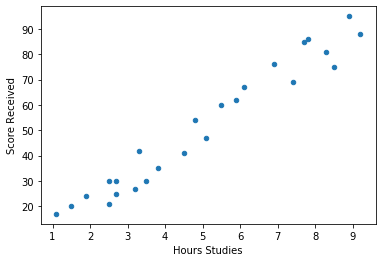

In [8]:
data.plot(kind='scatter',x="Hours",y="Scores")
plt.xlabel("Hours Studies")
plt.ylabel("Score Received")
# after viewing the graph this gives us a idea for Linear Regression Algorithm 

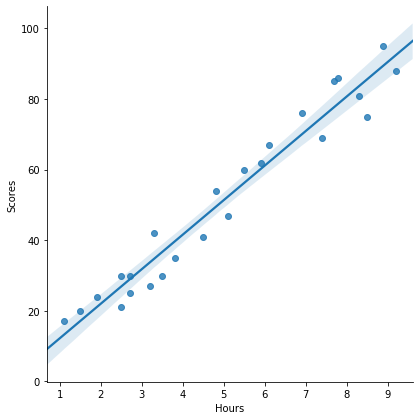

In [9]:
sns.pairplot(data=data,x_vars='Hours',y_vars='Scores',kind='reg',aspect=1,height=6)

## Creating the Simple Regression Model

In [10]:
x = data.iloc[:,0:1]
y = data.iloc[:,1:2]

In [11]:
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


<p> Now as we stores the values of x and y let's split the data into train and test data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
original = y_test

(18, 1)
(7, 1)
(18, 1)
(7, 1)


## Train the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# intercepts and coeffients of model
print(regressor.coef_)
print(regressor.intercept_)

[[9.94167834]]
[1.93220425]


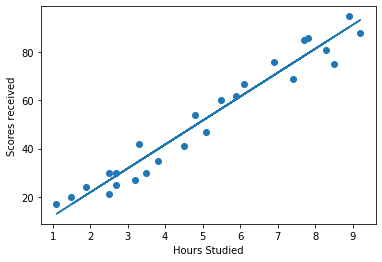

In [17]:
# plotting the best fit line
line = (regressor.coef_)*x.values + regressor.intercept_
plt.scatter(x.values,y.values)
plt.xlabel("Hours Studied")
plt.ylabel("Scores received")
plt.plot(x,line)

## Predicting the scores 

In [18]:
pred = regressor.predict(X_test)
pred

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [24]:
y_test['Predicted'] = pred

C:\Users\Rishabh Pagaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
y_test

,Scores,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [23]:
# inputing the value
hours = [[9.25]]
hours_pred = regressor.predict(hours)
print("No. of Hours Studied : ",hours[0][0])
print("Score Predicted : ",hours_pred[0][0])

No. of Hours Studied :  9.25
Score Predicted :  93.89272889341655


In [21]:
# Evaluating the accuracy of the model
from sklearn import metrics

In [22]:
accuaracy = metrics.mean_absolute_error(original,pred)
print("The accuracy of model is : ",accuaracy)

The accuracy of model is :  4.130879918502486


In [26]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))